# importing Libraries and images

In [1]:
import pandas as pd
import numpy as np 
import cv2
import os
import matplotlib.pyplot as plt
import random
from skimage.filters import threshold_otsu

In [2]:
image1 = cv2.imread('camera.png', 0)
image2 = cv2.imread('coins.png', 0)
image3 = cv2.imread('page.png', 0)
image4 = cv2.imread('rocksample.png', 0)
#image5 = cv2.imread('mango.png', 0)

imglist = [image1,image2, image3, image4]#, image5]

## Display all images

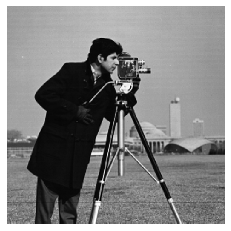

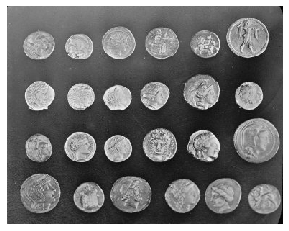

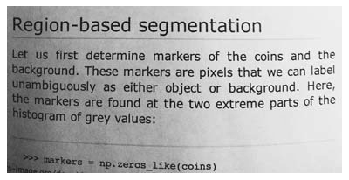

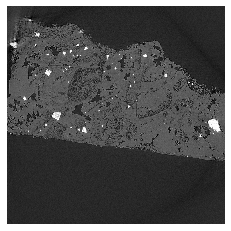

In [3]:
for i in imglist:
    plt.figure()
    plt.axis('off')
    plt.imshow(i, cmap='gray')

# Kmeans - K = 2

## Camera picture

In [34]:
img = imglist[0]
#img2 = imglist[1]
#img3 = imglist[2]
#img4 = imglist[3]
#img5 = imglist[4]
x,y = img.shape
points_random = [ random.randint(0, 255) for i in range(2) ]
"""color 0 to 255"""
hist,bins = np.histogram(img,256,[0,256])
'''Histogram for counting pixel values'''
center1_avg, center2_avg = 0,0

def kmeans(histogram):
    for k in range(0,10):
        if k == 0:
            center1, center2 = points_random[0], points_random[1]
        else:
            center1, center2 = center1_avg,center2_avg
        point1_center, point2_center = [],[]
        value1_center, value2_center = [],[]
        sum1,sum2 = 0,0
        for i,val in enumerate(histogram):
            '''Calculate euclidean distance'''
            if  abs(i - center1) <  abs(i - center2):
                point1_center.append(i)
                value1_center.append(val)
                sum1 = sum1 + (i * val)
            else:
                point2_center.append(i)
                value2_center.append(val)
                sum2 = sum2 + (i * val)
        center1_avg = int(sum1)/sum(value1_center)
        center2_avg = int(sum2)/sum(value2_center)
    return [point1_center,point2_center] 

segment_k2 = kmeans(hist)
img_segment_k2 = np.zeros((x,y))
for i in range(x):
    for j in range(y):
        if (img[i][j] in segment_k2[1]):
            img_segment_k2[i][j] = int(0)
        else:
            img_segment_k2[i][j] = int(1)

(-0.5, 511.5, 511.5, -0.5)

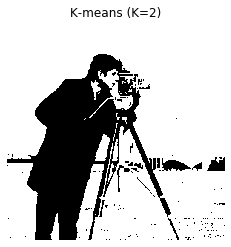

In [35]:
plt.figsize = ((10,10))
plt.title('K-means (K=2)')
plt.imshow(img_segment_k2, cmap='gray')
plt.axis('off')

# Otsu

#### Camera

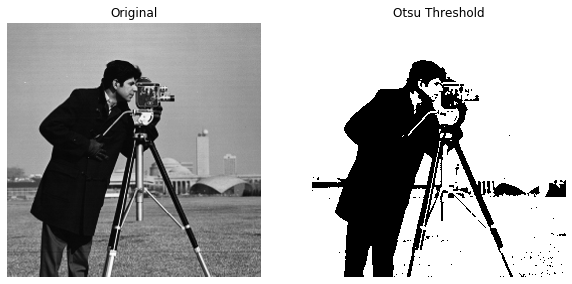

In [36]:
image = imglist[0]
thresh = threshold_otsu(image)
binary = image > thresh

fig, axes = plt.subplots(ncols=2, figsize=(10, 10))
ax = axes.ravel()
ax[0] = plt.subplot(1, 2, 1)
ax[1] = plt.subplot(1, 2, 2, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap = plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis("off")

ax[1].imshow(binary, cmap=plt.cm.gray)
ax[1].set_title('Otsu Threshold')
ax[1].axis("off")
plt.show()

#### Coins

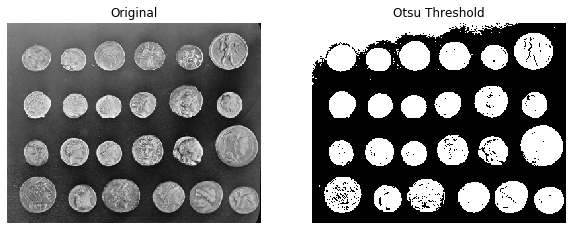

In [17]:
image = imglist[1]
thresh = threshold_otsu(image)
binary = image > thresh

fig, axes = plt.subplots(ncols=2, figsize=(10, 10))
ax = axes.ravel()
ax[0] = plt.subplot(1, 2, 1)
ax[1] = plt.subplot(1, 2, 2, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap = plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis("off")

ax[1].imshow(binary, cmap=plt.cm.gray)
ax[1].set_title('Otsu Threshold')
ax[1].axis("off")
plt.show()

#### Page

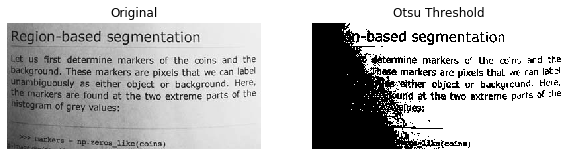

In [68]:
image = imglist[2]
thresh = threshold_otsu(image)
binary = image > thresh

fig, axes = plt.subplots(ncols=2, figsize=(10, 10))
ax = axes.ravel()
ax[0] = plt.subplot(1, 2, 1)
ax[1] = plt.subplot(1, 2, 2, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap = plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis("off")

ax[1].imshow(binary, cmap=plt.cm.gray)
ax[1].set_title('Otsu Threshold')
ax[1].axis("off")
plt.show()

# Smoothing

In [69]:
def iteration_neigh_4or8(seg,threshold,number_of_neigh,iterations):
    # Seg: segmented image size(x,y)
    #Threshold: Number of pixels before replace -- for 4 neighbours max is 4
    #Number_of_neigh: Number of neighbours, can be 4 or 8
    #iterations: Number of iterations - Beware!! this is a slow algortithm
    # Returns the "cleaned" segmented image
    for k in range(iterations):
        if number_of_neigh ==4:
            for i in range(seg.shape[0]-1):
                for j in range(seg.shape[1]-1):     
                    if i > 0 and i < seg.shape[0]-1 and j > 0 and j < seg.shape[1]-1:
                        neigh_4 = np.array([(seg[i-1,j]),(seg[i+1,j]),(seg[i,j-1]),(seg[i,j+1])])
                        counts = np.bincount(neigh_4)
                        counts_num = np.max(counts)
                        if counts_num >= threshold:
                            seg[i,j] = np.argmax(counts)
        else:
            for i in range(seg.shape[0]-1):
                for j in range(seg.shape[1]-1):     
                    if i > 0 and i < seg.shape[0]-1 and j > 0 and j < seg.shape[1]-1:
                        neigh_8 = np.array([(seg[i-1,j]),(seg[i+1,j]),(seg[i,j-1]),(seg[i,j+1]),
                                            seg[i-1,j-1],seg[i-1,j+1],seg[i+1,j-1],seg[i+1,j+1]])
                        counts = np.bincount(neigh_8)
                        counts_num = np.max(counts)
                        if counts_num >= threshold:
                            seg[i,j] = np.argmax(counts)
        #print("Cleaning with: " + str(number_of_neigh) + '\n'
        #+ "Number of iterations done: " + str(k))
    return(seg)


In [70]:
Cleaning4_3 = iteration_neigh_4or8(img_segment_k2.astype(int), 3, 4, 10)
Cleaning4_4 = iteration_neigh_4or8(img_segment_k2.astype(int), 4, 4, 10)

In [71]:
Cleaning8_5 = iteration_neigh_4or8(img_segment_k2.astype(int), 5, 8, 10)
Cleaning8_4 = iteration_neigh_4or8(img_segment_k2.astype(int), 4, 8, 10)
Cleaning8_6 = iteration_neigh_4or8(img_segment_k2.astype(int), 6, 8, 10)

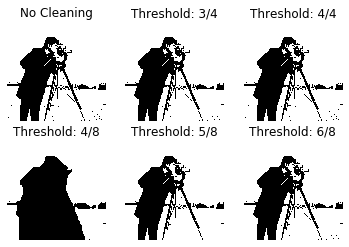

In [72]:
plt.figsize=(20,20)
plt.subplot(231)
plt.imshow(img_segment_k2, cmap='gray')
plt.title("No Cleaning")
plt.axis("off")

plt.subplot(232)
plt.imshow(Cleaning4_3, cmap='gray')
plt.title("Threshold: 3/4")
plt.axis("off")

plt.subplot(233)
plt.imshow(Cleaning4_4, cmap='gray')
plt.title("Threshold: 4/4")
plt.axis("off")

plt.subplot(234)
plt.imshow(Cleaning8_4, cmap='gray')
plt.title("Threshold: 4/8")
plt.axis("off")

plt.subplot(235)
plt.imshow(Cleaning8_5, cmap='gray')
plt.title("Threshold: 5/8")
plt.axis("off")

plt.subplot(236)
plt.imshow(Cleaning8_6, cmap='gray')
plt.title("Threshold: 6/8")

plt.axis("off")

plt.savefig("Clean_cam.png",dpi=1000)

# Kmeans - K = 4

In [45]:
img = cv2.imread('camera.png', 0)
x,y = img.shape

points_random = [ random.randint(0, 255) for i in range(4) ]
hist,bins = np.histogram(img,256,[0,256])

center1_avg, center2_avg, center3_avg, center4_avg = 0,0,0,0

def kmeans(histogram):
    for k in range(0,10):
        if k == 0:
            center1, center2 = points_random[0],points_random[1]
            center3, center4 = points_random[2],points_random[3]
        else:
            center1, center2 = center1_avg, center2_avg
            center3, center4 = center3_avg, center4_avg
        point1_center, point2_center = [],[]
        point3_center, point4_center = [],[]
        value1_center, value2_center = [],[]
        value3_center, value4_center = [],[]
        sum1, sum2 = 0,0
        sum3, sum4 = 0,0
        for i,val in enumerate(histogram):
            '''Calculate euclidean distance'''
            if  (abs(i - center1) <  abs(i - center2) and
            abs(i - center1) <  abs(i - center3) and abs(i - center1) <  abs(i - center4)):
                
                point1_center.append(i)
                value1_center.append(val)
                sum1 = sum1 + (i * val)
            elif abs(i - center2) <  abs(i - center3) and abs(i - center2) <  abs(i - center4):
                point2_center.append(i)
                value2_center.append(val)
                sum2 = sum2 + (i * val)
            elif abs(i - center3) <  abs(i - center4):
                point3_center.append(i)
                value3_center.append(val)
                sum3 = sum3 + (i * val)
            else:
                point4_center.append(i)
                value4_center.append(val)
                sum4 = sum4 + (i * val)
        center1_avg = int(sum1)/sum(value1_center)
        center2_avg = int(sum2)/sum(value2_center)
        center3_avg = int(sum3)/sum(value3_center)
        center4_avg = int(sum4)/sum(value4_center)
    return [point1_center,point2_center, point3_center, point4_center] 

segment_k4 = kmeans(hist)
img_segment_k4 = np.zeros((x,y))

for i in range(x):
    for j in range(y):
        if (img[i][j] in segment_k4[0]):
            img_segment_k4[i][j] = int(0)

        elif (img[i][j] in segment_k4[1]):
            img_segment_k4[i][j] = int(50)
                
        elif (img[i][j] in segment_k4[2]):
            img_segment_k4[i][j] = int(77)

        else:
            img_segment_k4[i][j] = int(100)

(-0.5, 511.5, 511.5, -0.5)

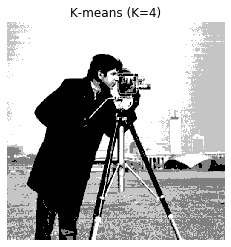

In [46]:
plt.figsize = ((10,10))
plt.title('K-means (K=4)')
plt.imshow(img_segment_k4, cmap='gray')
plt.axis('off')

# Scikit learn implementations

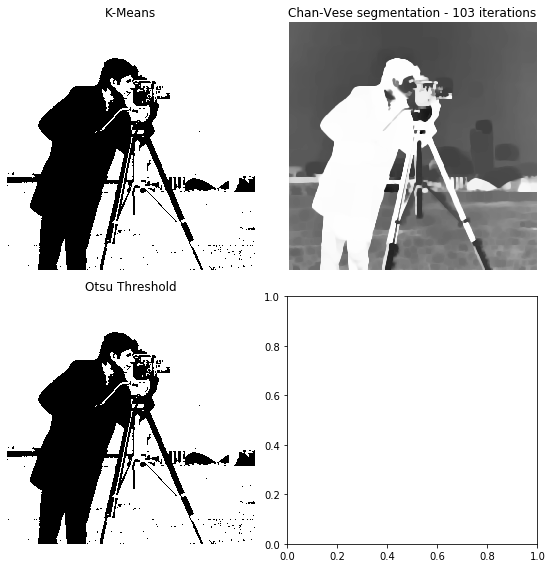

In [38]:
from skimage.segmentation import chan_vese

chan = chan_vese(image1, mu=0.25, lambda1=1, lambda2=1, tol=1e-3, max_iter=200,
               dt=0.5, init_level_set="checkerboard", extended_output=True)


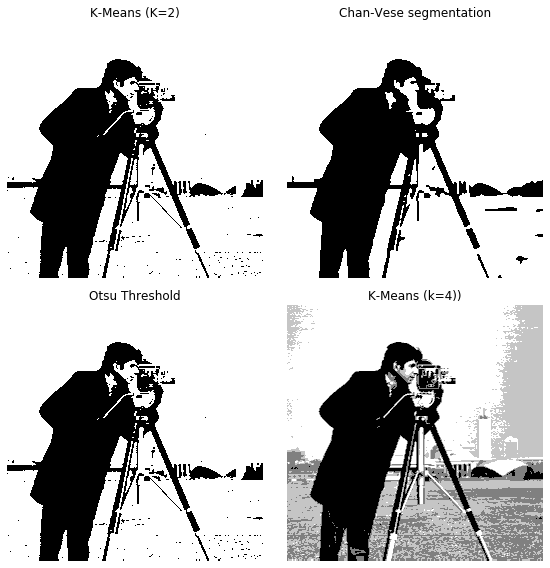

In [51]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
ax = axes.flatten()
ax[0].imshow(img_segment_k2, cmap="gray")
ax[0].set_axis_off()
ax[0].set_title("K-Means (K=2)", fontsize=12)

ax[1].imshow(np.invert(chan[0]), cmap="gray")
ax[1].set_axis_off()
ax[1].set_title('Chan-Vese segmentation')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Otsu Threshold')
ax[2].axis("off")

ax[3].imshow(img_segment_k4, cmap=plt.cm.gray)
ax[3].set_title('K-Means (k=4))')
ax[3].axis("off")

fig.tight_layout()
plt.show()